In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Load the dataset 
load diabetes_data

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


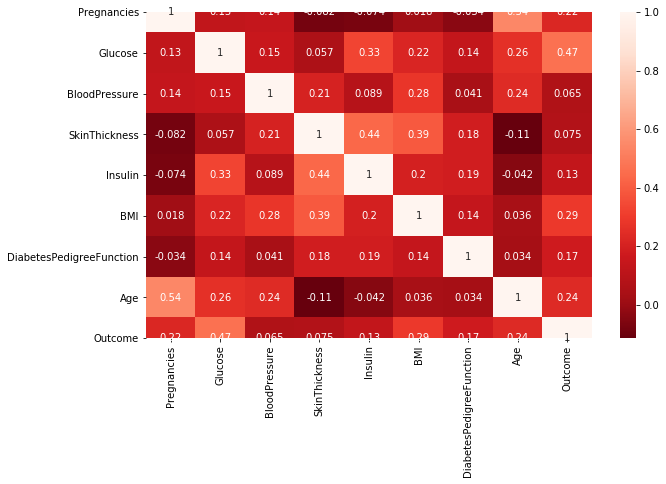

In [2]:
import seaborn as sns 
from sklearn import preprocessing

df = pd.read_csv('diabetes_data.csv')
print(df.head())
df.dropna(inplace=True)
df.describe()

#X = df[df.columns.difference(['Outcome'])]
X = df[['Glucose', 'BMI']]
 
y = df['Outcome']
#print(X)
#print(type(X))
#print(type(y))
#print(df.corr())


plt.figure(figsize=(10,6))
df_numer_corr = df.corr()
sns.heatmap(df_numer_corr, annot=True, cmap=plt.cm.Reds_r)
plt.show()

In [3]:
target_col_name = 'Outcome'
df_corr = df.corr()
print(df.head())
cor_target = abs(df_corr[target_col_name])
cor_target.sort_values(inplace = True)
#exclude the same ('Temperature (C)') feature 
#cor_target = cor_target[:-1]
cor_target.dropna(inplace=True)
cor_target = cor_target[:-1]
print(cor_target)

def show_correlation_summary(cor_target):
    very_high_correlation = cor_target[(cor_target >= 0.9) & (cor_target <= 1)]
    high_correlation = cor_target[(cor_target >= 0.7) & (cor_target < 0.9)]
    moderate_correlation = cor_target[(cor_target >= 0.5) & (cor_target < 0.7)]
    low_correlation = cor_target[(cor_target >= 0.3) & (cor_target < 0.5)]
    negligible_correlation = cor_target[(cor_target < 0.3)]
    print('very_high_correlation: ', very_high_correlation.index.tolist())
    print('high_correlation: ', high_correlation.index.tolist())
    print('moderate_correlation: ', moderate_correlation.index.tolist())
    print('low_correlation: ', low_correlation.index.tolist())
    print('very_low_correlation: ', negligible_correlation.index.tolist())
show_correlation_summary(cor_target)
best_feature = cor_target.idxmax()
print('best_feature: ', best_feature)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Name: O

## Divide the dataset into train and test datasets

In [4]:
def matrix_data(X_data):
    k = X_data.shape[1] #independent feature count
    n = len(X_data)
    data_vector = np.array(X_data).reshape((n, k))
    #add ones column for intercept
    return np.c_[np.ones(data_vector.shape[0]), data_vector]

def featureNormalization(X, mean, std):
    """
    Take in numpy array of X values and return normalize X values
    """
    return (X - mean)/std

In [5]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest=train_test_split(X, y, test_size=0.2,random_state=22)

sts = StandardScaler()
sts.fit(xTrain)
xTrain = sts.transform(xTrain)
xTest = sts.transform(xTest)

## Implement the following functions to create your own logistic regression algorithm from scratch.
#### Feel free to use more additinal functions in your implementation.

In [6]:
xTrain = matrix_data(xTrain)
xTest = matrix_data(xTest)

def sigmoid(X):
    
    """
    :param X: data matrix (2 dimensional np.array)
    
    """
    return 1.0/(1 + np.exp(-X)) 

In [7]:
def logistic_func(beta, X):
    """
    :param X: data matrix (2 dimensional np.array)
    :param beta: value of beta (1 dimensional np.array)
    
    """
    Z = np.dot(X, beta.T)
    
    return sigmoid(Z)

In [8]:
def gradient(beta, X, Y):
    """
    :param X: data matrix (2 dimensional np.array)
    :param Y: response variables (1 dimensional np.array)
    :param beta: value of beta (1 dimensional np.array)
    :return: np.array i.e. gradient according to the data
    
    """
    transpose = (logistic_func(beta, X) - Y).T
    return np.dot(transpose, X)

In [9]:
def cost_func(X, Y, beta, lamda):
    """
    :param X: data matrix (2 dimensional np.array)
    :param Y: response variables (1 dimensional np.array)
    :param beta: value of beta (1 dimensional np.array)
    :return: numberic value of the cost function
    
    """
    n = X.shape[0]
    d = len(beta) - 1
    regular = lamda / 2 * d * (np.sum(beta**2))
    log_0 = np.log(1 - logistic_func(beta, X))
    log_1 = np.log(logistic_func(beta, X))   
    cost = -((Y * log_1) + ((1 - Y) * log_0)) 
    return cost + regular 

In [10]:
def gradient_descent(X, Y, epsilon=1e-4, learning_rate=.01, max_steps=1000, lamda=.01):
    """
    :param X: data matrix (2 dimensional np.array)
    :param Y: response variables (1 dimensional np.array)
    :param epsilon: threshold for a change in cost function value
    :param max_steps: maximum number of iterations before algorithm will
        terminate.
    :return: value of beta (1 dimensional np.array)
    
    """
    beta = np.zeros(X.shape[1])
    cost = np.mean(cost_func(X, Y, beta, lamda))
    change_cost = 1
    d = X.shape[1]
    num_iter = 1
    
    while (change_cost > epsilon):  
        old_cost = cost
        step_size_0 = learning_rate * gradient(beta, X, Y)[0]
        regul = (lamda/d * beta[1:])
        step_size_1 = learning_rate * (gradient(beta, X, Y)[1:] + regul)
        beta[0] = beta[0] - step_size_0
        beta[1:] = beta[1:] - step_size_1 
        
        cost = np.mean(cost_func(X, Y, beta, lamda)) 
        change_cost = abs(old_cost - cost) 
        
        if (num_iter >= max_steps):
            break
        num_iter += 1
    return beta  

## Run logistic regression using the features of your choice and using "Outcome" as a target variable

In [11]:
betas_train = gradient_descent(xTrain, yTrain, epsilon=1e-8, learning_rate=1e-4, max_steps=1000, lamda=.01)
print('betas_train: ', betas_train)
betas_test = gradient_descent(xTest, yTest, epsilon=1e-8, learning_rate=1e-4, max_steps=1000, lamda=.01)
print('betas_test: ', betas_test)

betas_train:  [-0.8328302   1.13102064  0.59753584]
betas_test:  [-0.57008975  1.00043707  0.55300311]


## Use the logistic regression available in Sklearn on the same data.

In [12]:
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics

model = LogisticRegression(C=100, solver='liblinear', max_iter=1000)
model.fit(xTrain, yTrain)
y_pred_test = model.predict(xTest)
y_pred_train = model.predict(xTrain)
accuracy_train = metrics.accuracy_score(yTrain, y_pred_train)
accuracy_test = metrics.accuracy_score(yTest, y_pred_test)
parameters = model.coef_
print('accuracy_train:', accuracy_train*100) 
print('accuracy_test:', accuracy_test*100) 
print('sklearn_betas:', parameters.flatten())

accuracy_train: 77.0358306188925
accuracy_test: 74.02597402597402
sklearn_betas: [-0.41680182  1.1319557   0.59818084]


In [ ]:
cnf_matrix = metrics.confusion_matrix(yTest, y_pred_test)
cnf_matrix

In [ ]:
def predict(threshold, X, beta):
        p_sigmoid = logistic_func(X, beta)
        return pd.Series(np.where(p_sigmoid > threshold, 1, 0))

In [ ]:
y_pred_train_my = predict(0.5, xTrain, betas_train)
print(betas_train.shape)
print(xTrain)
y_pred_test_my = predict(0.5, xTest, betas_test)

print('my_accuracy_train:', metrics.accuracy_score(yTrain, y_pred_train_my)*100)
print('my_accuracy_test:', metrics.accuracy_score(yTest, y_pred_test_my)*100)
#print('my_betas_train:', betas_train)

## Extra: try to plot the results of your algorithm i.e. a scatter plot of points classified into 2 classes in different colors.

In [ ]:
def plot_logistic(X, y, beta):
      
    x_0 = X[np.where(y == 0.0)] 
    x_1 = X[np.where(y == 1.0)]  
    plt.scatter([x_0[:, 1]], [x_0[:, 2]], c='g', label='y = 0') 
    plt.scatter([x_1[:, 1]], [x_1[:, 2]], c='r', label='y = 1') 
      
    #decision boundary 
    x1 = np.arange(-2, 3, 0.1) 
    x2 = -(beta[0] + beta[1] * x1) / beta[2] 
    plt.plot(x1, x2, c='k', label='reg line') 
  
    plt.xlabel('x1') 
    plt.ylabel('x2') 
    plt.legend() 
    plt.show() 

In [ ]:
print('Train data set:    ')
plot_logistic(xTrain, yTrain, betas_train)
print('Test data set:     ')
plot_logistic(xTest, yTest, betas_test)

In [ ]:
import seaborn as sns

sns.lmplot('Glucose', 'BMI', df, hue='Outcome', fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.show()